54
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Valve                              1
ITT Family Games                   1
Elite                              1
Evolution Games                    1
Red Flagship                       1
Name: Publisher, Length: 581, dtype: int64
(9612, 16)
(7617, 16)
(9443, 16)
(6854, 16)
(6758, 16)
(3765, 16)
(9479, 16)
(6730, 16)
(9628, 16)
(9628, 16)


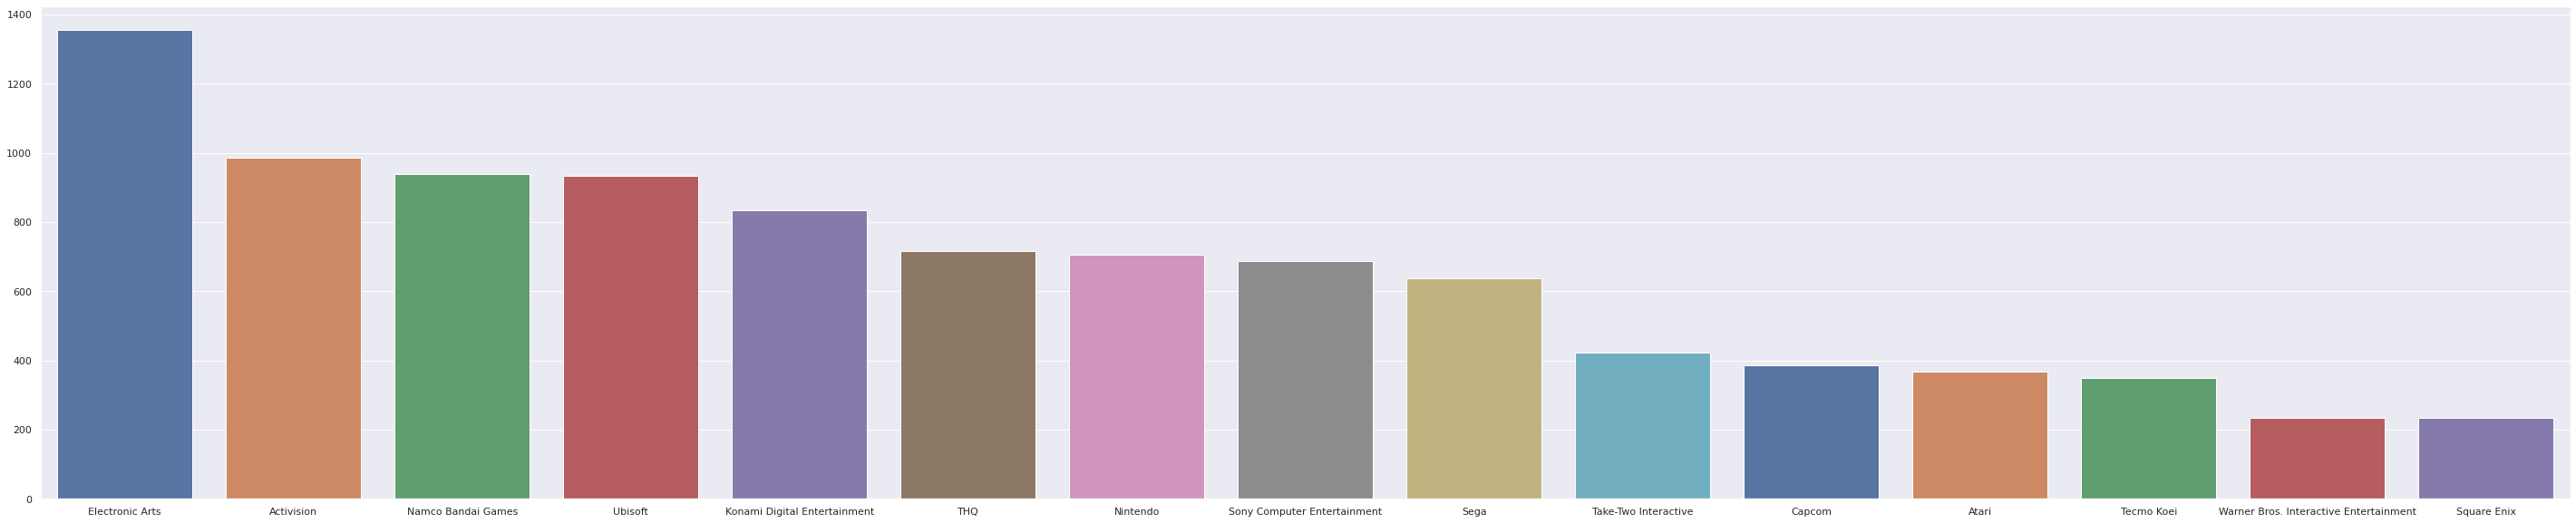

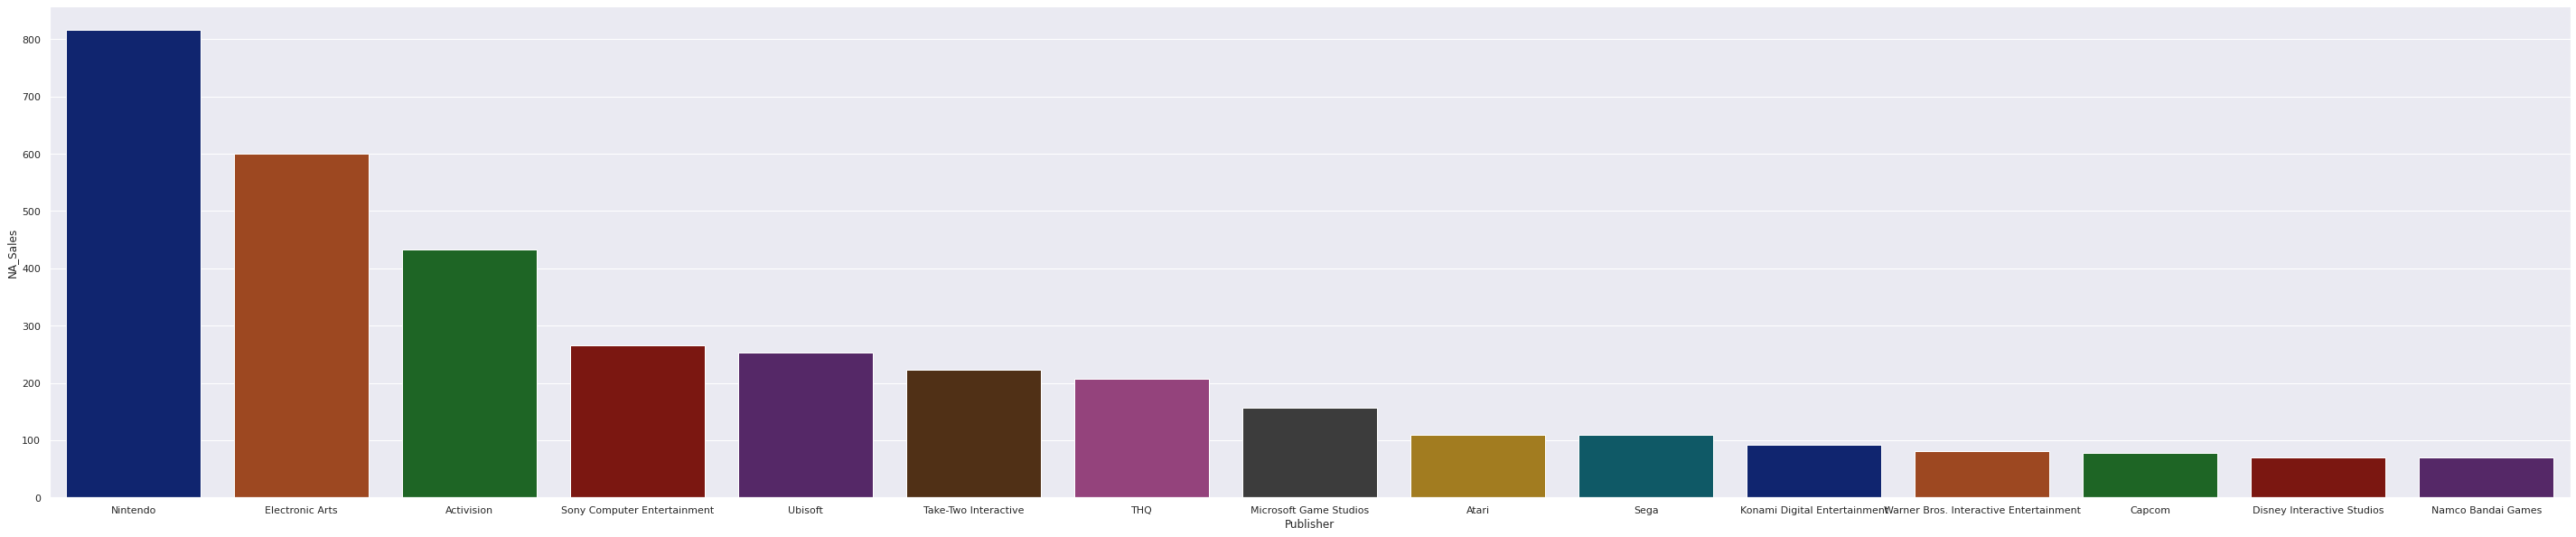

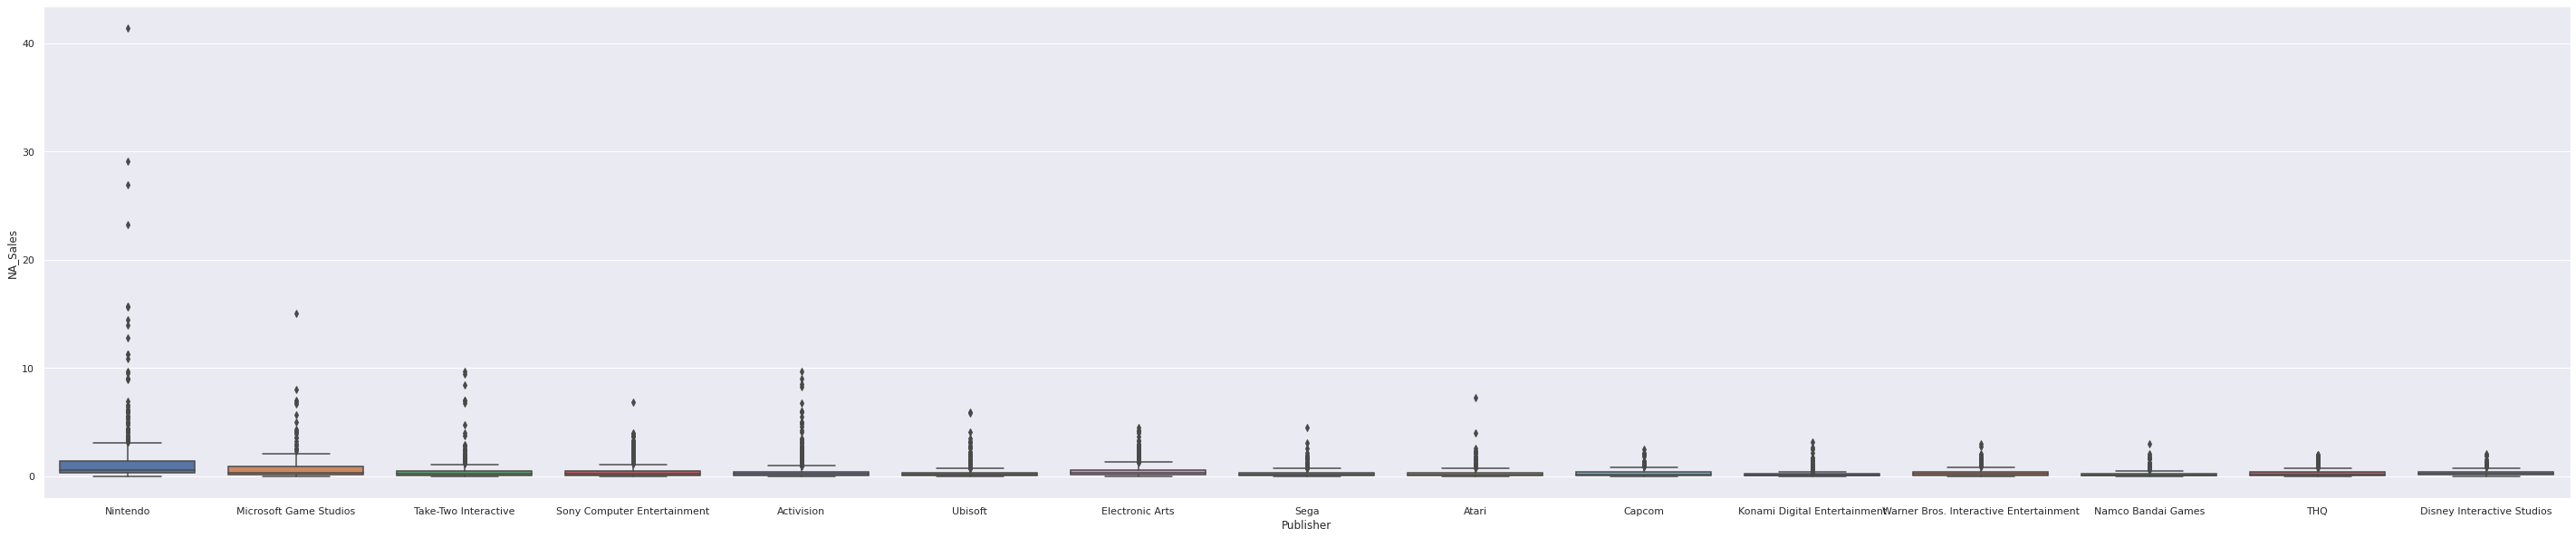

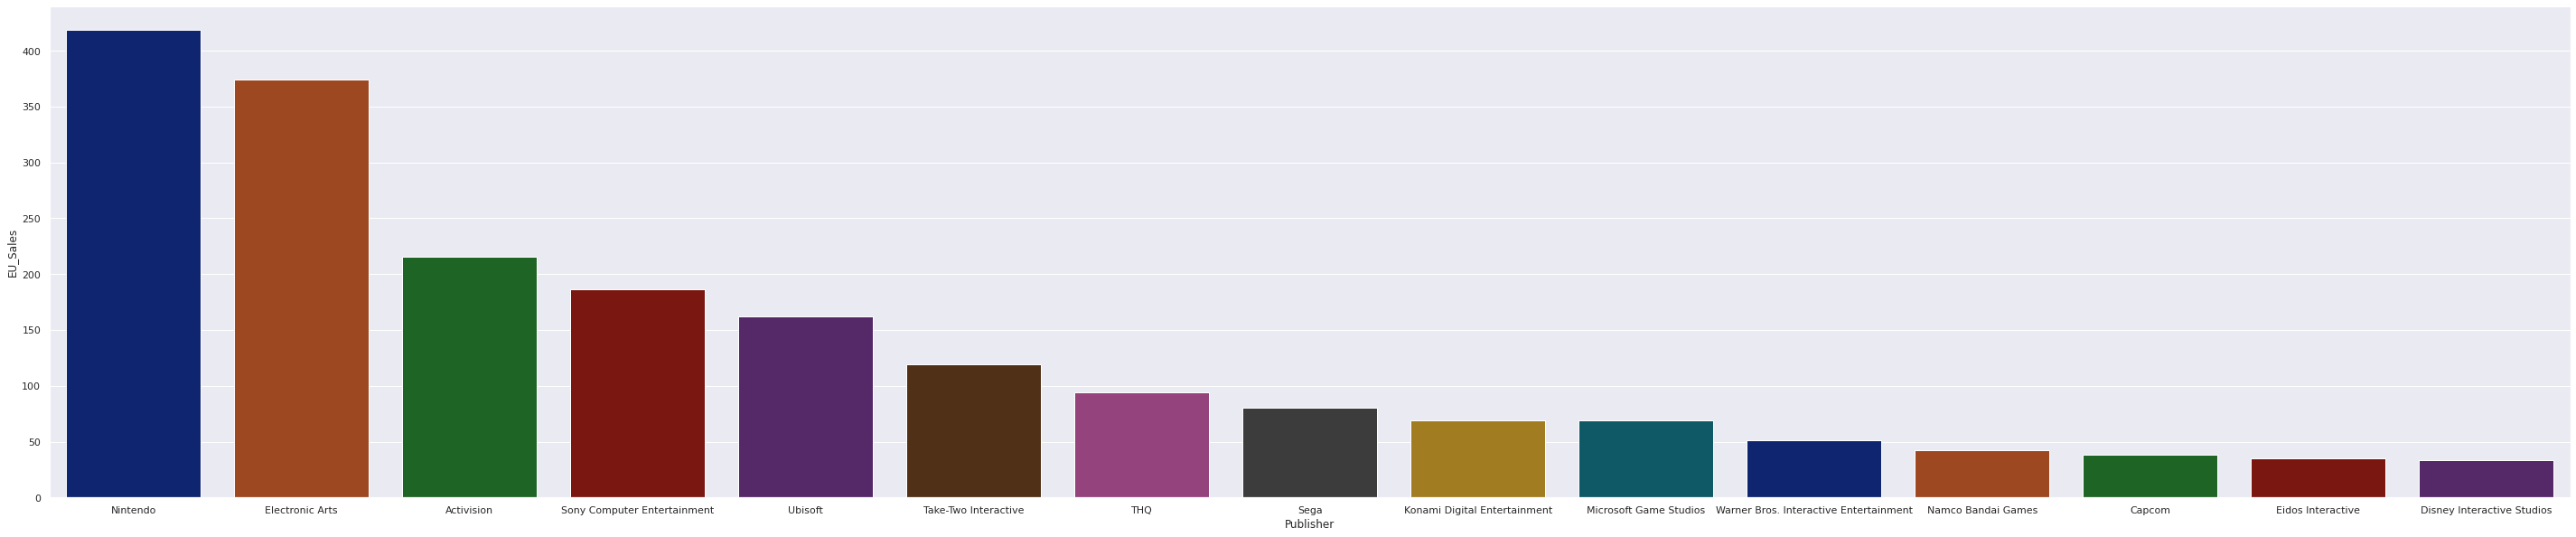

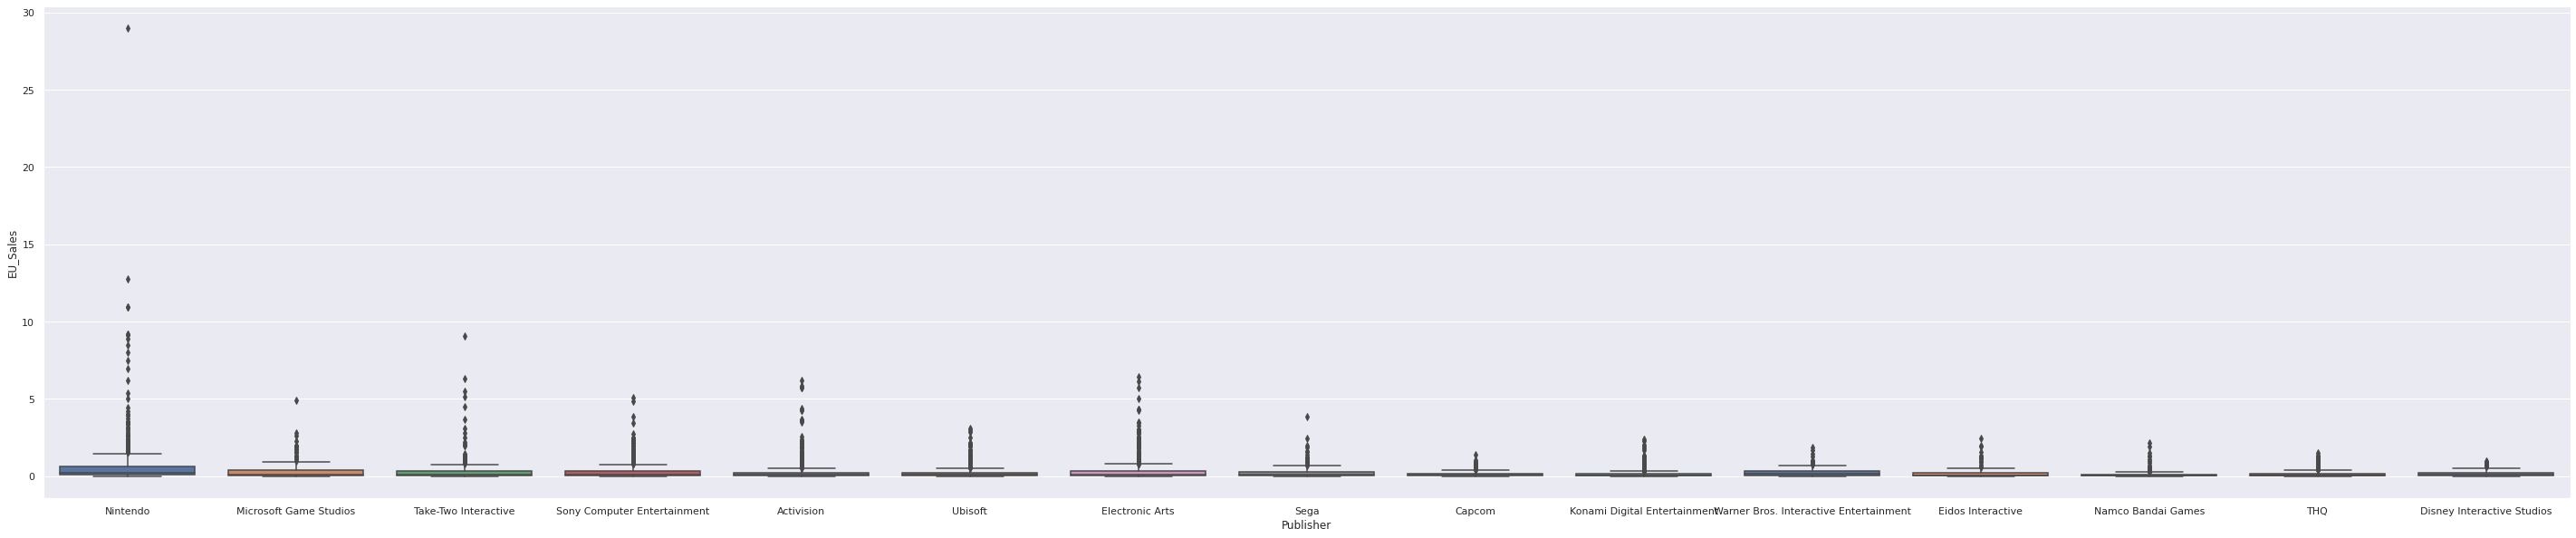

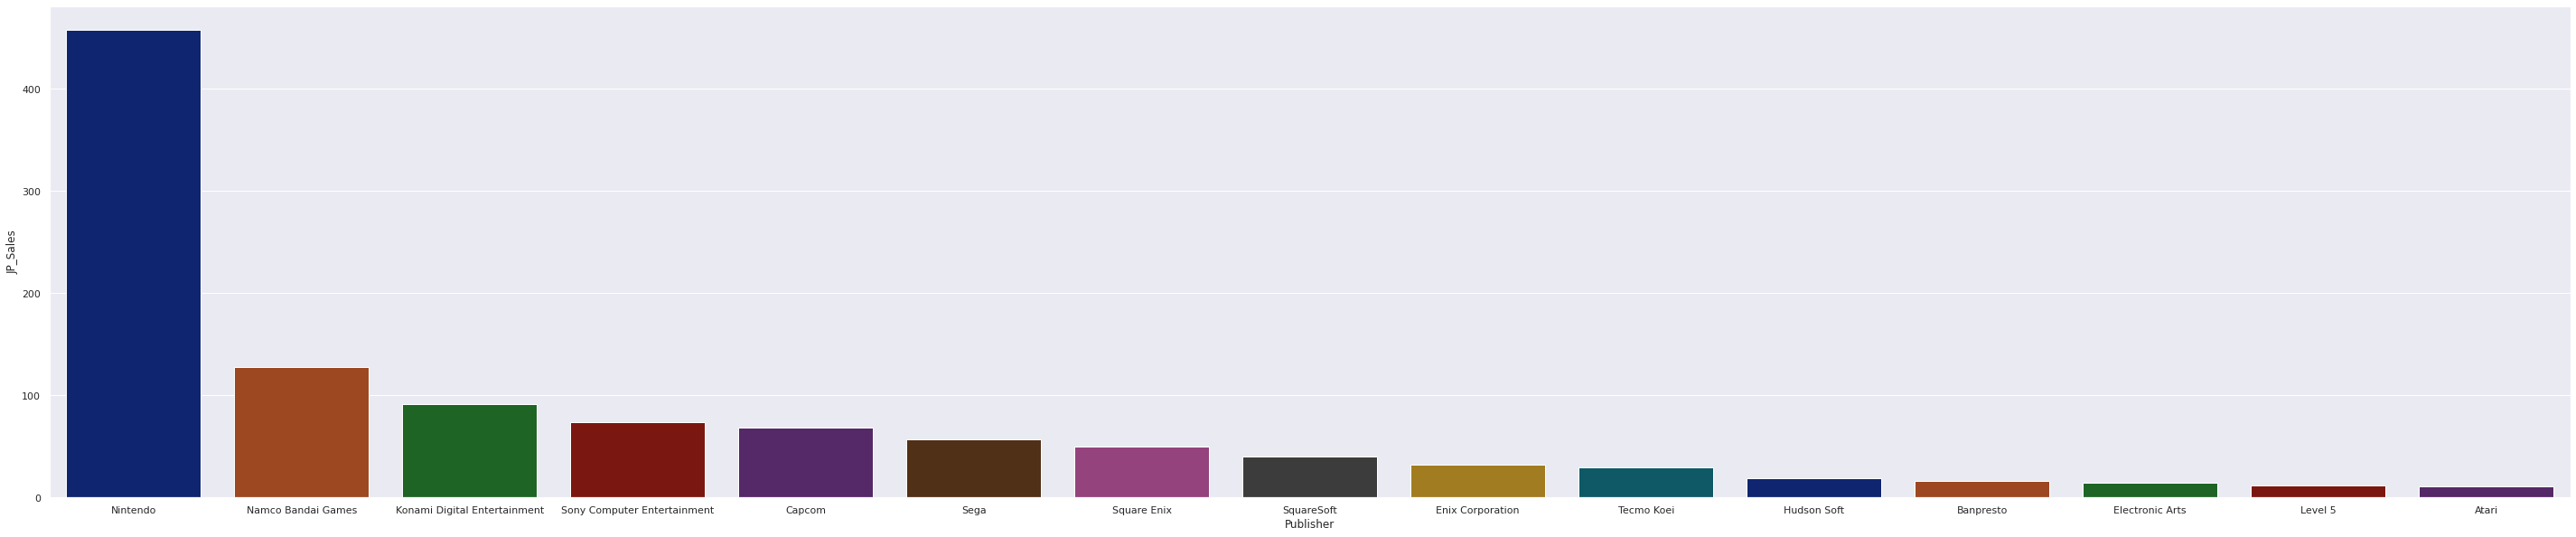

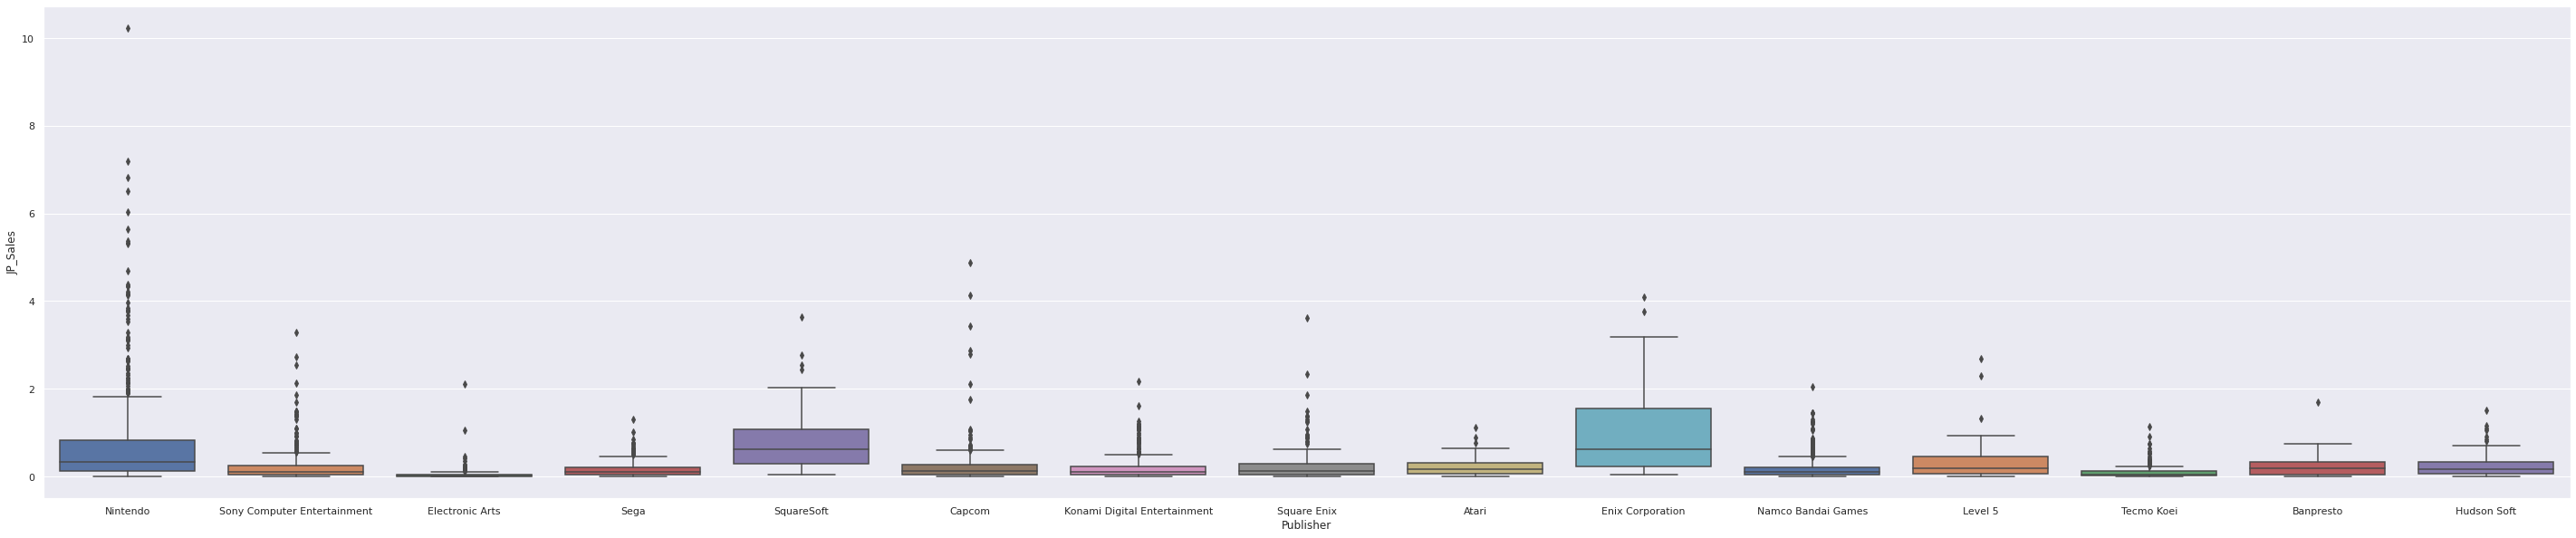

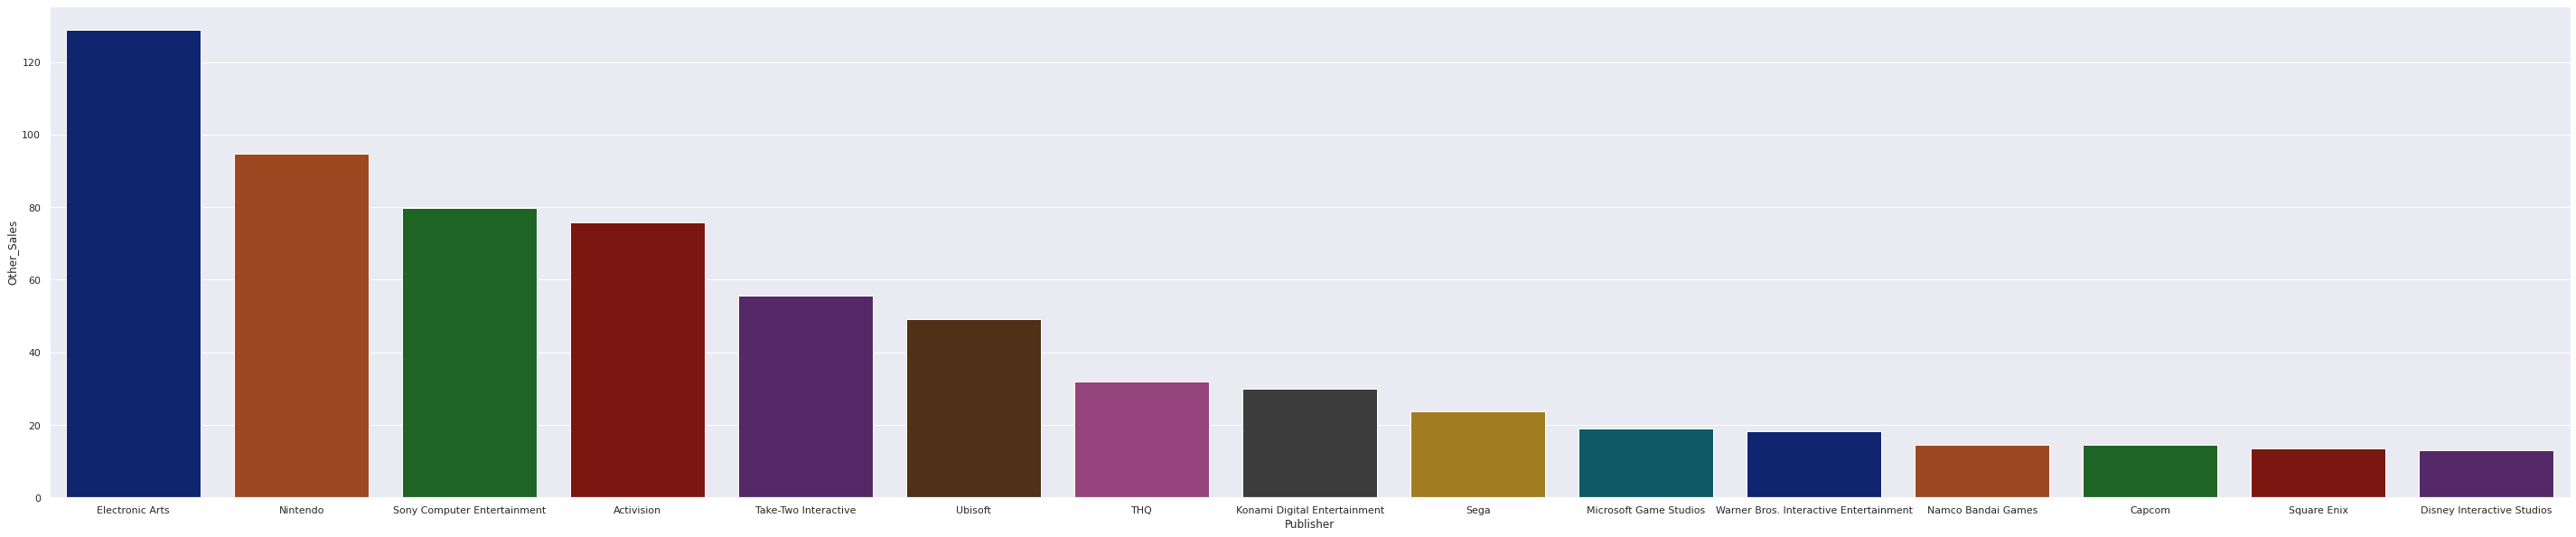

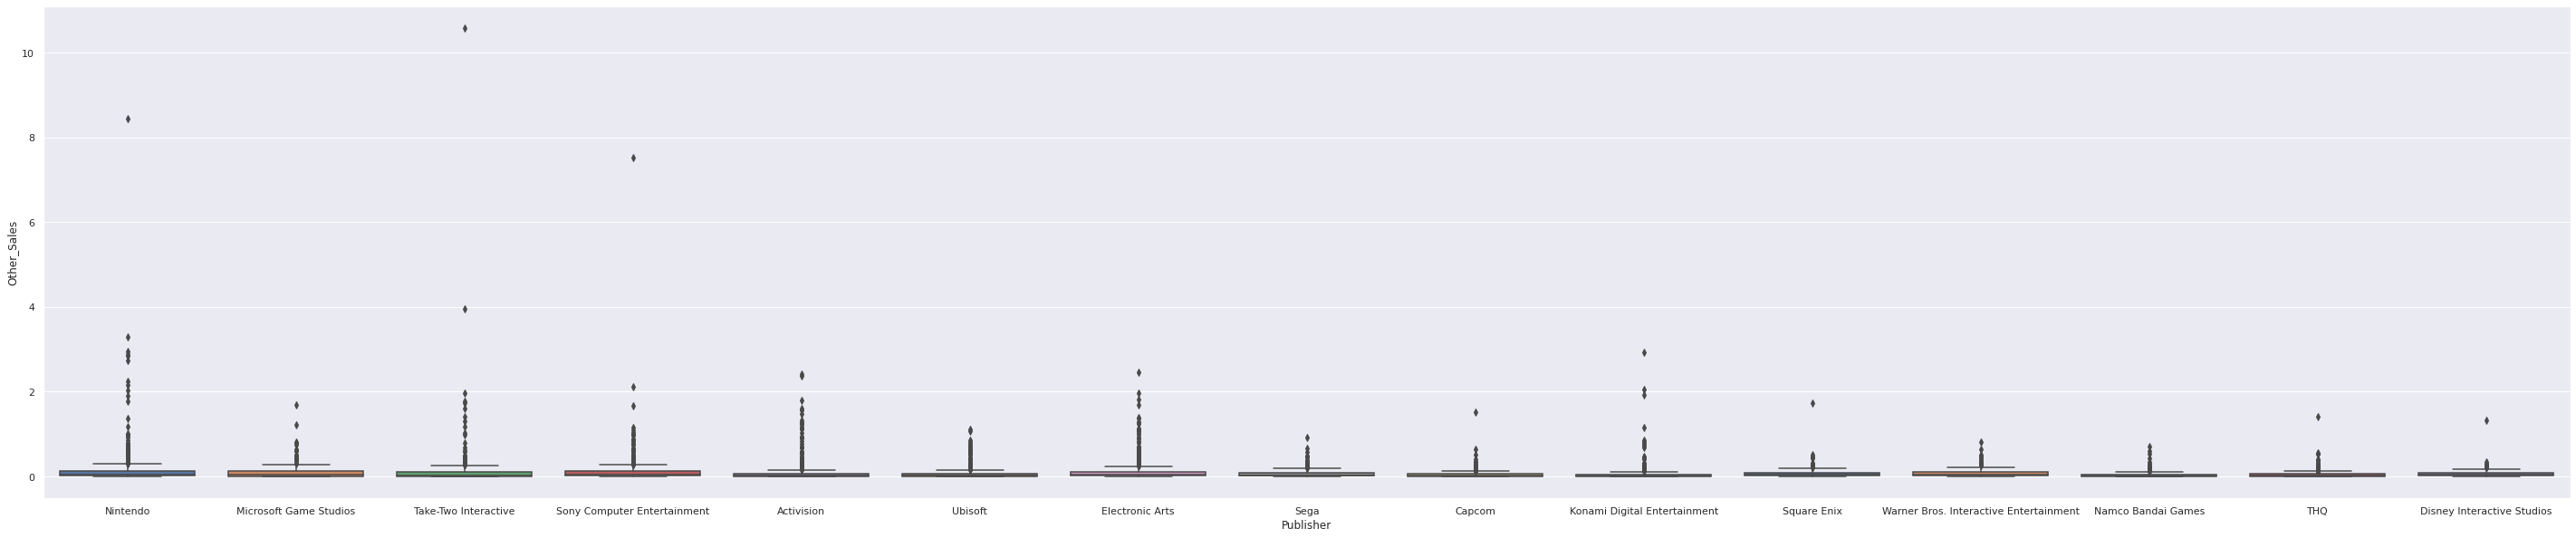

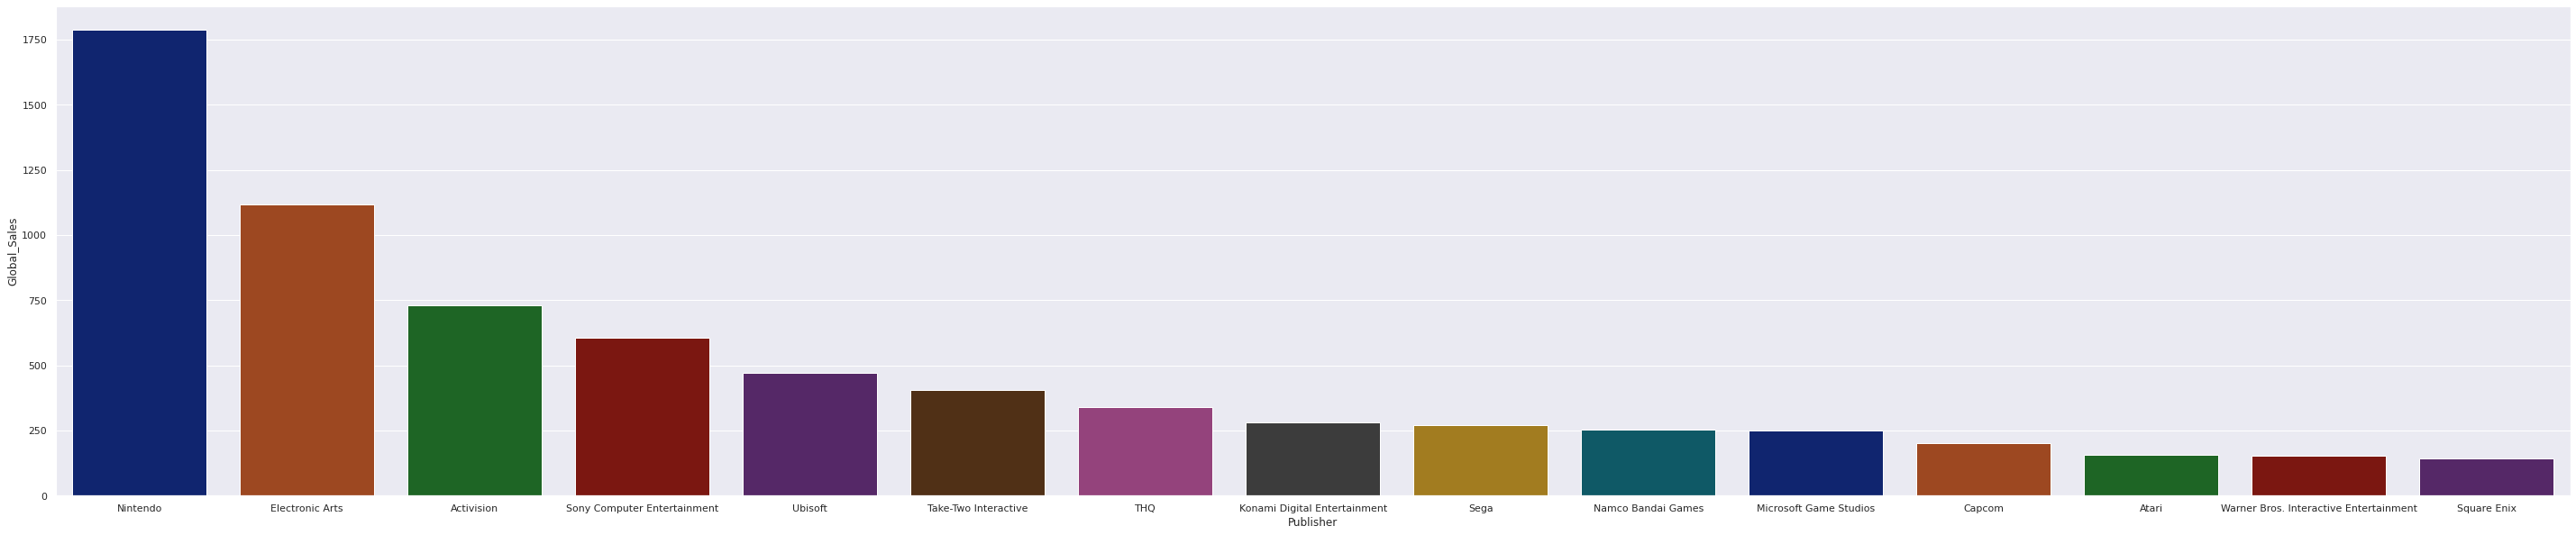

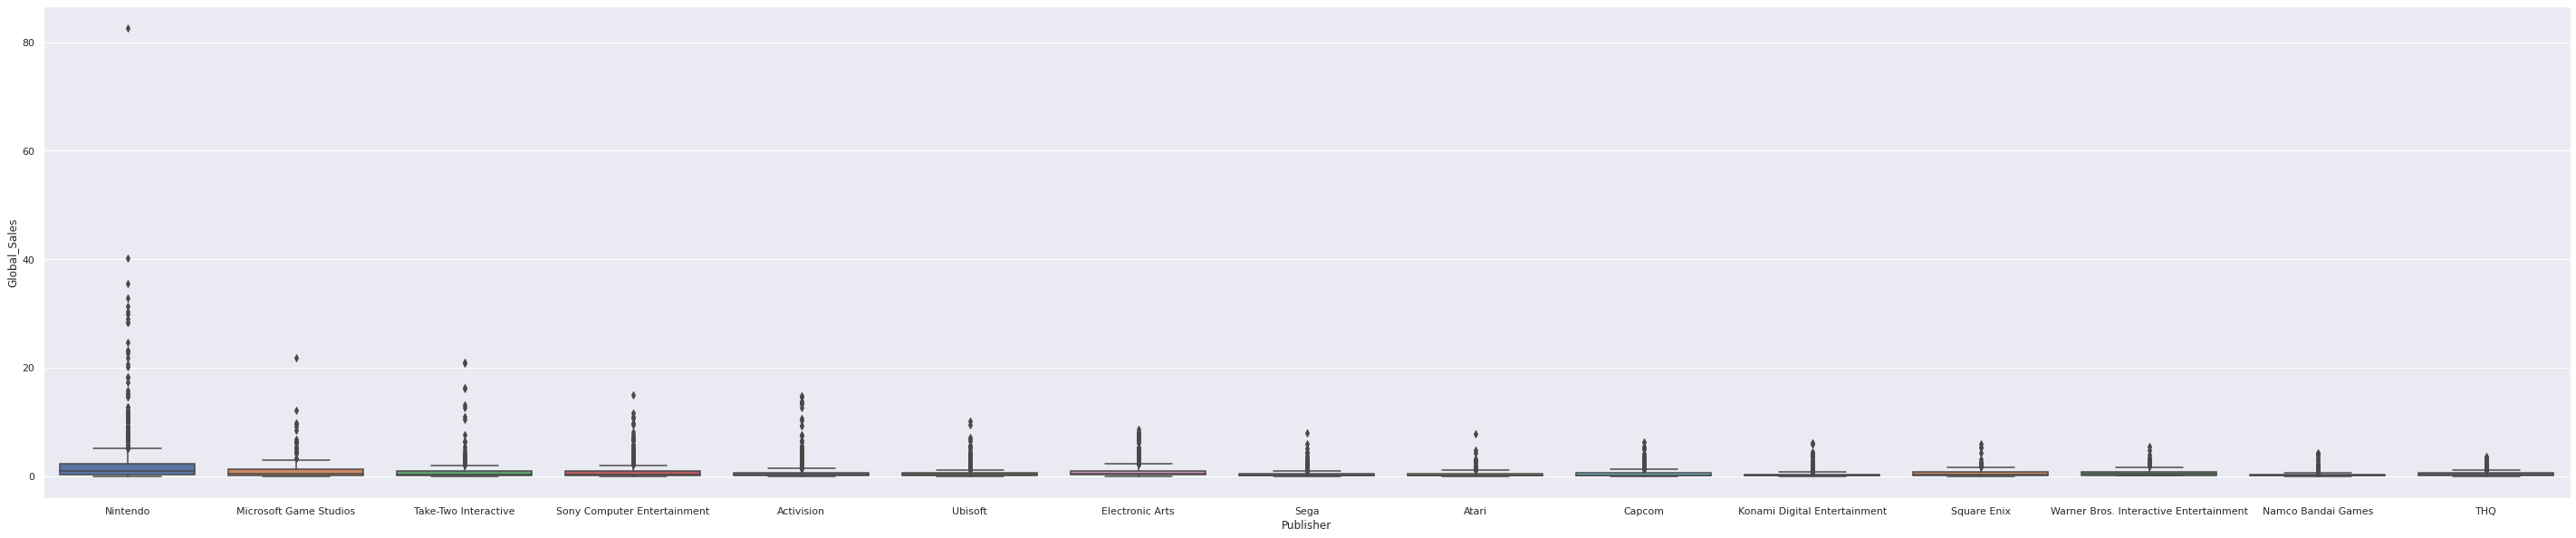

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from collections import Counter 
import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



data = pd.read_csv('/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv')

sales = ["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
#checking invalid data rows
print(data["Publisher"].isnull().sum());
print(data[["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].isnull().sum())
#simple cleaning
cleaned_data = data[data['Publisher'].notna()]
print(cleaned_data["Publisher"].value_counts())

#top 15 publishers with the most number of games
top_15 = Counter(cleaned_data['Publisher'].tolist()).most_common(15)
top_x, top_y = [x[0] for x in top_15], [x[1] for x in top_15]
f = plt.figure(figsize= (50,10))
sb.barplot(x=top_x,y=top_y, palette="deep")


def plot_most_popular(data, region):
    publisher = data.groupby(["Publisher"])[region].sum().reset_index()
    top_15 = publisher.nlargest(15,region)
    f = plt.figure(figsize= (50,10))
    #total sales
    sb.barplot(data=top_15, x="Publisher", y=region, palette="dark")
    game_sales_scatter = data.loc[data["Publisher"].isin(top_15['Publisher'])]
    print(game_sales_scatter.shape)
    game_sales_scatter = game_sales_scatter[game_sales_scatter[region] > 0]
    print(game_sales_scatter.shape)
    f = plt.figure(figsize= (50,10))
    sb.boxplot(data=game_sales_scatter, x="Publisher", y=region, palette="deep")

    
#NA sales
plot_most_popular(cleaned_data,"NA_Sales")
#EU Sales
plot_most_popular(cleaned_data,"EU_Sales")
#JP Sales
plot_most_popular(cleaned_data,"JP_Sales")
#Other Sales
plot_most_popular(cleaned_data,"Other_Sales")
#Global Sales
plot_most_popular(cleaned_data,"Global_Sales")        
#to be continued





<AxesSubplot:title={'center':'Other_Sales'}, ylabel='Platform'>

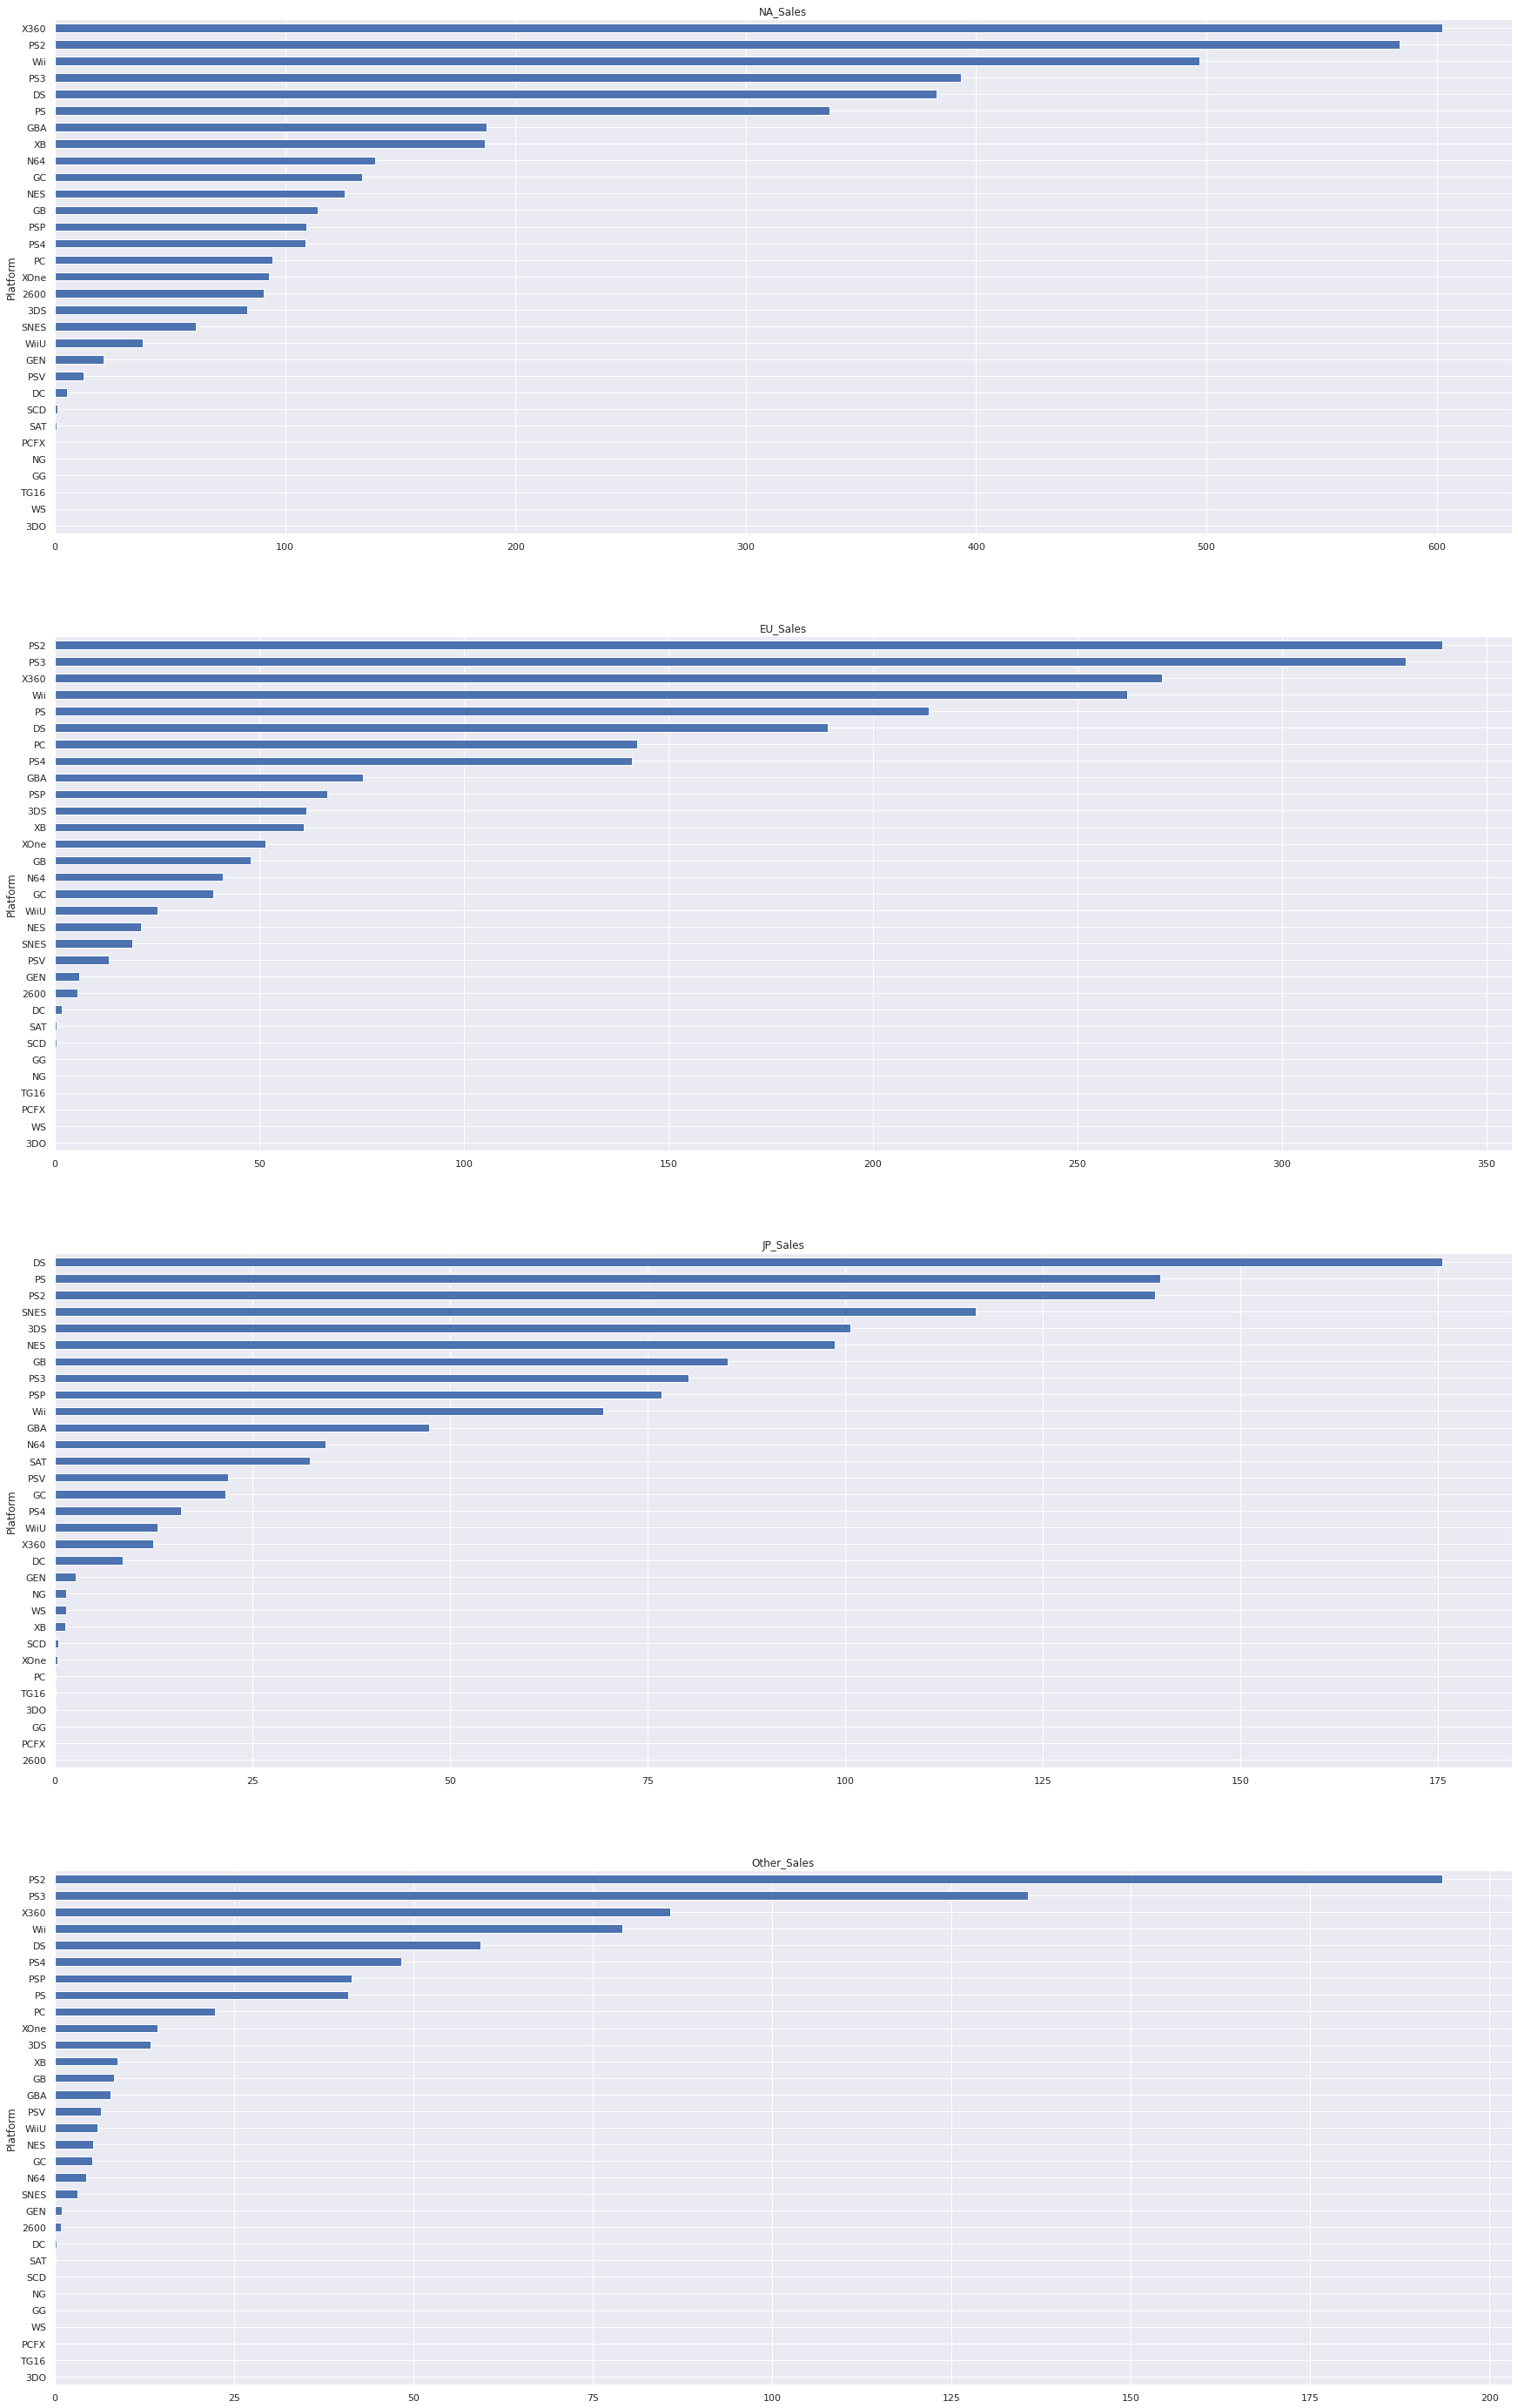

In [2]:
f, axes = plt.subplots(4, 1, figsize=(30, 50))
data.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='NA_Sales', ax = axes[0])
data.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='EU_Sales', ax = axes[1])
data.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='JP_Sales', ax = axes[2])
data.groupby('Platform')['Other_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='Other_Sales', ax = axes[3])